<a href="https://colab.research.google.com/github/mayankjain281/Project_5_Yulu/blob/main/Project_5_Yulu.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Business Problem



Yulu has recently suffered considerable dips in its revenues. They have contracted a consulting company to understand the factors on which the demand for these shared electric cycles depends.


Objective:

* To find which variables are significant in predicting the demand for shared electric cycles in the Indian market?
* To understand how well those variables describe the electric cycle demands

Concept Used:

* Bi-Variate Analysis
* 2-sample t-test: testing for difference across populations
* ANNOVA
* Chi-square

#### import modules and load data

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from scipy.stats import norm, chi2, f # distributions

from scipy.stats import ttest_ind, ttest_rel, f_oneway, kruskal # numerical vs categorical
from scipy.stats import chisquare, chi2_contingency # categorical features
from scipy.stats import pearsonr, spearmanr # numeric vs numeric

from scipy.stats import kstest # cdf

from statsmodels.distributions.empirical_distribution import ECDF
# Empirical CDF

In [ ]:
df=pd.read_csv('/content/bike_sharing.txt')

In [ ]:
df

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
10881,2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,7,329,336
10882,2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,10,231,241
10883,2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,4,164,168
10884,2012-12-19 22:00:00,4,0,1,1,13.94,17.425,61,6.0032,12,117,129


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


#### Basic data exploration

In [ ]:
df.shape
# 10886 rows, 12 columns

(10886, 12)

In [ ]:
df.isna().sum()
# No missing value

datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
count         0
dtype: int64

In [ ]:
df.dtypes
# checking datatype of columns

datetime       object
season          int64
holiday         int64
workingday      int64
weather         int64
temp          float64
atemp         float64
humidity        int64
windspeed     float64
casual          int64
registered      int64
count           int64
dtype: object

In [ ]:
df.nunique()
# few int columns have very less unique values, we will convert them to object

datetime      10886
season            4
holiday           2
workingday        2
weather           4
temp             49
atemp            60
humidity         89
windspeed        28
casual          309
registered      731
count           822
dtype: int64

In [ ]:
# Drop unnecessary columns
df.drop('datetime',axis=1, inplace=True )

In [ ]:
columns=['season','holiday','workingday','weather']
df[columns] = df[columns].astype('object')

In [ ]:
df.dtypes

season         object
holiday        object
workingday     object
weather        object
temp          float64
atemp         float64
humidity        int64
windspeed     float64
casual          int64
registered      int64
count           int64
dtype: object

In [ ]:
## separeate categorical and numeric features.
# catgeorical and numerical columns
cat_cols = df.dtypes =='object'
cat_cols = list(cat_cols[cat_cols].index)
cat_cols

['season', 'holiday', 'workingday', 'weather']

In [ ]:
num_cols = df.dtypes !='object'
num_cols = list(num_cols[num_cols].index)
num_cols

['temp', 'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count']

### Univariate Data Analysis

In [ ]:
#Checking how the data is spread on basis of distinct users (customer analysis)
df2=df.copy()
cat_count = df2[cat_cols].melt().groupby(['variable', 'value'])[['value']].size().reset_index(name='counts')
s = df2[cat_cols].melt().variable.value_counts()
cat_count['Percent'] = cat_count['counts'].div(cat_count['variable'].map(s)).mul(100).round().astype('int')
cat_count.groupby(['variable', 'value']).first()

# only 1 electric cycles rented in extreame weather 4. (outlier)
# only 3% days are holidays.

counts  Percent
variable   value                 
holiday    0       10575       97
           1         311        3
season     1        2686       25
           2        2733       25
           3        2733       25
           4        2734       25
weather    1        7192       66
           2        2834       26
           3         859        8
           4           1        0
workingday 0        3474       32
           1        7412       68

In [ ]:
df[df['weather']==4]

# Only one row where weather is 4, so will replace it's value with 3.

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
5631,1,0,1,4,8.2,11.365,86,6.0032,6,158,164


In [ ]:
df['weather'].replace(4,3,inplace=True)
df['weather'].value_counts()

1    7192
2    2834
3     860
Name: weather, dtype: int64

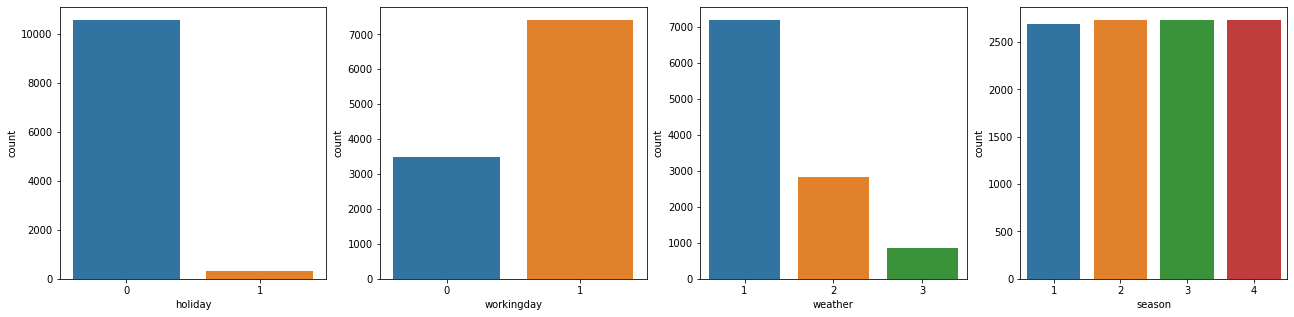

In [ ]:
plt.figure(figsize = [22,5])
cat_cols = ['holiday','workingday','weather','season']
for i in range (len(cat_cols)):
  plt.subplot(1, 4, i+1)
  sns.countplot(data=df, x=cat_cols[i])

# Weather 1 is most liklihood weather.

In [ ]:
df.describe(include='object')

,season,holiday,workingday
count,10886,10886,10886
unique,4,2,2
top,4,0,1
freq,2734,10575,7412


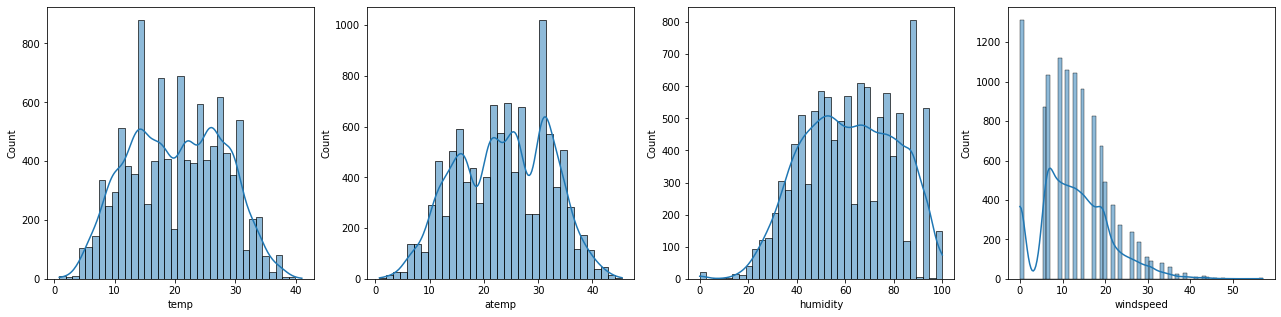

In [ ]:
plt.figure(figsize = [22,5])
num_cols = ['temp', 'atemp', 'humidity', 'windspeed']
for i in range (len(num_cols)):
  plt.subplot(1, 4, i+1)
  sns.histplot(data=df, x=num_cols[i], kde=True)

In [ ]:
for i in (num_cols):
  print(i, round(df[i].skew(),1))

# windspeed distributioni is right skewed, means it has some outliers in right.

temp 0.0
atemp -0.1
humidity -0.1
windspeed 0.6


In [ ]:
from scipy.stats import shapiro
num_cols = ['temp', 'atemp', 'humidity', 'windspeed']
for i in (num_cols):
  print(shapiro(df[i]).pvalue)

# Since the p-value is less than .05, we reject the null hypothesis. 
# By shapiro test we can say that the sample data does not come from a normal distribution.
# We can use non parametric tests or We can normalize it and then do parametic test.
# but We are considering this sample data normally distributed in further analysis. 
# Because in visual plots we can see that variables are looking fairly normally distributed, 
# and our analysis is not quite sensitive to output, so we use parametic test directly.

4.47221826500091e-36
3.4538982852050647e-35
1.245496990918048e-34
0.0


/usr/local/lib/python3.8/dist-packages/scipy/stats/morestats.py:1760: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


<Figure size 1584x360 with 0 Axes>

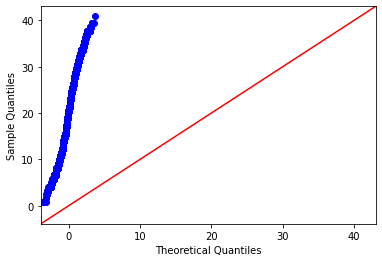

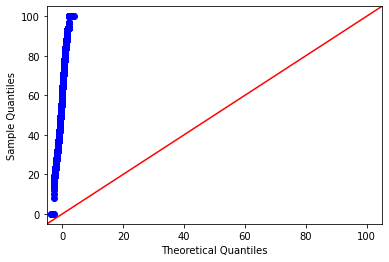

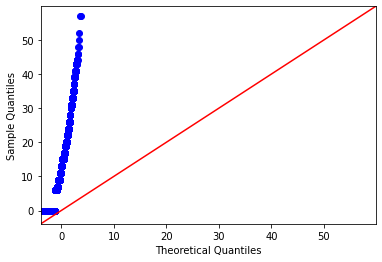

In [ ]:
import statsmodels.api as sm
import matplotlib.pyplot as plt
plt.figure(figsize = [22,5])
num_cols = ['temp', 'humidity', 'windspeed']
for i in (num_cols):
  sm.qqplot(df[i], line ='45')

#The data values clearly do not follow the red 45-degree line, 
# which is an indication that they do not follow a normal distribution.

In [ ]:
from scipy.stats import levene
stat, p = levene(df['temp'],df['atemp'], center ='median')
p

1.3036286748857844e-16

In [ ]:
from scipy.stats import levene
stat, p = levene(df['temp'],df['atemp'], center ='mean')
p

3.23529399853922e-17

In [ ]:
alpha =0.05
# now we pass the groups and center value from the following
# ('trimmed mean', 'mean', 'median')
w_stats, p_value =levene(df['temp'],df['atemp'], center ='median')
 
if p_value > alpha :
  print("We do not reject the null hypothesis")
else:
  print("Reject the Null Hypothesis")

# This means we do have sufficient evidence to say that the variance between temp and atemp is significantly different.

Reject the Null Hypothesis


In [ ]:
np.percentile(df['temp'],97.5)-np.percentile(df['temp'],2.5)

27.7775

In [ ]:
np.percentile(df['atemp'],97.5)-np.percentile(df['atemp'],2.5)

31.06

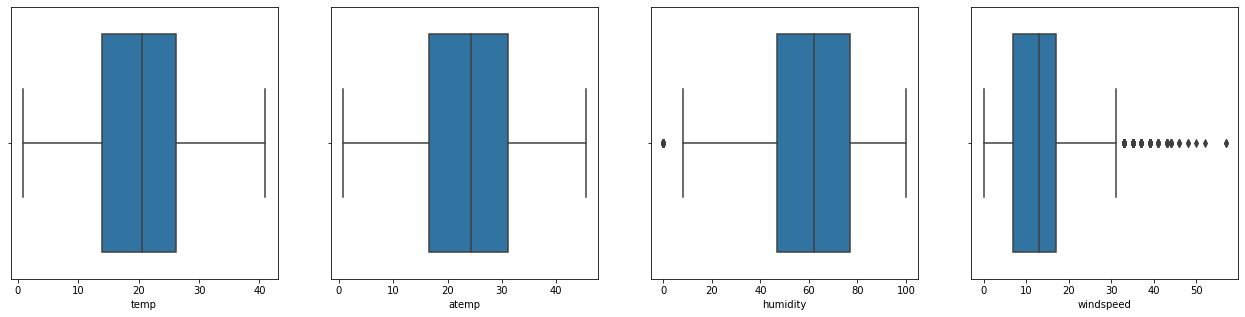

In [ ]:
plt.figure(figsize = [22,5])
num_cols = ['temp', 'atemp', 'humidity', 'windspeed']
for i in range (len(num_cols)):
  plt.subplot(1, 4, i+1)
  sns.boxplot(data=df, x=num_cols[i])

In [ ]:
df[num_cols].describe()

,temp,atemp,humidity,windspeed
count,10886.00000,10886.000000,10886.000000,10886.000000
mean,20.23086,23.655084,61.886460,12.799395
std,7.79159,8.474601,19.245033,8.164537
min,0.82000,0.760000,0.000000,0.000000
25%,13.94000,16.665000,47.000000,7.001500
50%,20.50000,24.240000,62.000000,12.998000
75%,26.24000,31.060000,77.000000,16.997900
max,41.00000,45.455000,100.000000,56.996900


In [ ]:
R_whisker = np.percentile(df['windspeed'],75)+(np.percentile(df['windspeed'],75)-np.percentile(df['windspeed'],25))*1.5
R_whisker

31.992500000000003

In [ ]:
df[df['windspeed']>R_whisker].index.size
# 227 outliers showing in windspeed column (using 1.5*IQR method).

227

In [ ]:
L_whisker = np.percentile(df['humidity'],25)-(np.percentile(df['humidity'],75)-np.percentile(df['humidity'],25))*1.5
L_whisker

2.0

In [ ]:
df[df['humidity']<L_whisker].index.size
# 22 outliers showing in humidity column (using 1.5*IQR method).

22

In [ ]:
# We have found outliers and we could remove,
# Since we have limited data, we will keep outliers in funther exploration and test.
# earlier we detected single outlier data point in weather column and we fixed it by imputation.

### Bivariate Data Analysis

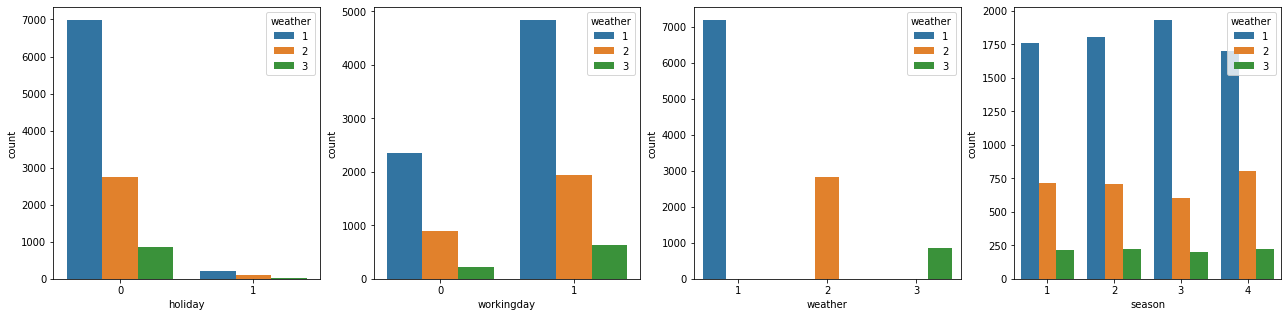

In [ ]:
plt.figure(figsize = [22,5])
cat_cols = ['holiday','workingday','weather','season']
for i in range (len(cat_cols)):
  plt.subplot(1, 4, i+1)
  sns.countplot(data=df, x=cat_cols[i],hue=cat_cols[2])

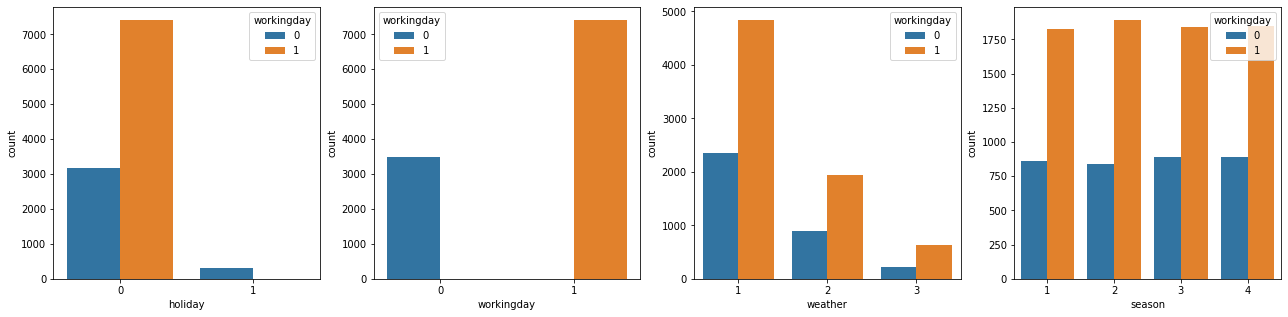

In [ ]:
plt.figure(figsize = [22,5])
cat_cols = ['holiday','workingday','weather','season']
for i in range (len(cat_cols)):
  plt.subplot(1, 4, i+1)
  sns.countplot(data=df, x=cat_cols[i],hue=cat_cols[1])

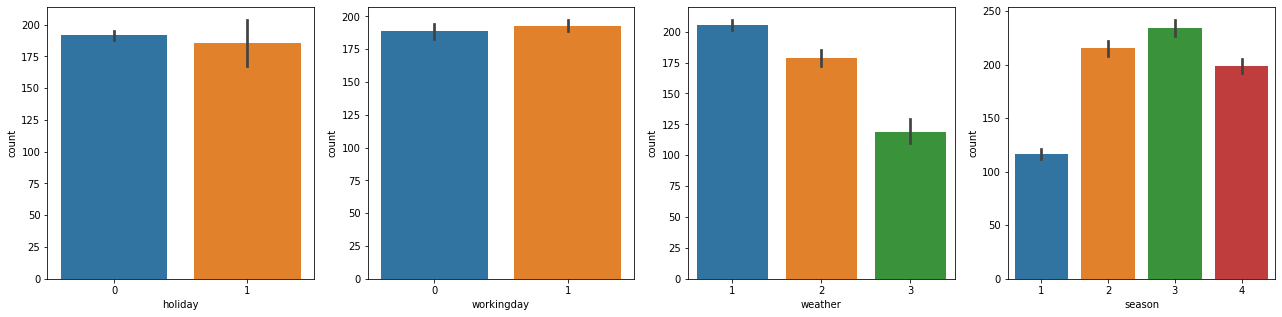

In [ ]:
plt.figure(figsize = [22,5])
cat_cols = ['holiday','workingday','weather','season']
for i in range (len(cat_cols)):
  plt.subplot(1, 4, i+1)
  sns.barplot(data=df, x=cat_cols[i], y='count')

### 2 Sample T-Test

In [ ]:
# Checking: Does number of electric cycles rented on weekday greater than weekend?

null_hypothesis = 'number of electric cycles rented are similer on weekday and weekend'    
alternative_hypothesis = 'number of electric cycles rented higher on weekday than weekend'

sample1 = df[df['workingday']==0]['count']
sample2 = df[df['workingday']==1]['count']
t_stat, p_value = ttest_ind(sample1, sample2, equal_var=False, alternative='greater')
print(t_stat, p_value)

if(p_value < 0.05):
  print('Since, p-value < 0.05, the null hypothesis is rejected')
  print(alternative_hypothesis)
else:
  print('Since p-value > 0.05, we fail to reject null hypothesis')
  print(null_hypothesis)

# conclusion: number of electric cycles rented are similer on weekday and weekend.

-1.2362580418223226 0.8917984385965245
Since p-value > 0.05, we fail to reject null hypothesis
number of electric cycles rented are similer on weekday and weekend


In [ ]:
# Checking: Does the Working Day has an effect on number of electric cycles rented?

null_hypothesis = 'Working Day has no effect on number of electric cycles rented'    
alternative_hypothesis = 'Working Day has effect on number of electric cycles rented'

sample1 = df[df['workingday']==0]['count']
sample2 = df[df['workingday']==1]['count']
t_stat, p_value = ttest_ind(sample1, sample2)
print(t_stat, p_value)

if(p_value < 0.05):
  print('Since, p-value < 0.05, the null hypothesis is rejected')
  print(alternative_hypothesis)
else:
  print('Since p-value > 0.05, we fail to reject null hypothesis')
  print(null_hypothesis)

# conclusion: workingday has no effect on number of electric cycles rented.

-1.2096277376026694 0.22644804226361348
Since p-value > 0.05, we fail to reject null hypothesis
Working Day has no effect on number of electric cycles rented


In [ ]:
print(np.std(sample1),np.std(sample2))
# There is not huge difference in standerd deviation, so no need to equalize size of samples.

173.69901006897658 184.501211667422


In [ ]:
df['workingday'].value_counts()
# We could make sample size equal for both variable (by considering lesser variable size).
# But we are not doing it because it is giving difference p_value and different result when doing same test multiple times.
# So we are considering unequal sample size to get fixed p_value (it might increase type 1 error, but it will give sure result).

1    7412
0    3474
Name: workingday, dtype: int64

### ANNOVA test

In [ ]:
# Checking : Are the number of cycles rented similar or different in the different seasons?

null_hypothesis = 'There is no significant difference in the No. of cycles rented in the different seasons'    
alternative_hypothesis = 'There is significant difference in No. of cycles rented in the different seasons'

sample1 = df[df['season']==1]['count']
sample2 = df[df['season']==2]['count']
sample3 = df[df['season']==3]['count']
sample4 = df[df['season']==4]['count']
t_stat, p_value = f_oneway(sample1,sample2,sample3,sample4)
print(t_stat, p_value)

if(p_value < 0.05):
  print('Since, p-value < 0.05, the null hypothesis is rejected')
  print(alternative_hypothesis)
else:
  print('Since p-value > 0.05, we fail to reject null hypothesis')
  print(null_hypothesis)

# conclusion: Number of cycles rented are similar in different seasons.

236.94671081032106 6.164843386499654e-149
Since, p-value < 0.05, the null hypothesis is rejected
There is significant difference in No. of cycles rented in the different seasons


In [ ]:
# Checking : Are the number of cycles rented similar or different in the different weather?

null_hypothesis = 'There is no significant difference in the No. of cycles rented in the different weather'    
alternative_hypothesis = 'There is significant difference in No. of cycles rented in the different weather'

sample1 = df[df['weather']==1]['count']
sample2 = df[df['weather']==2]['count']
sample3 = df[df['weather']==3]['count']
t_stat, p_value = f_oneway(sample1,sample2,sample3)
print(t_stat, p_value)

if(p_value < 0.05):
  print('Since, p-value < 0.05, the null hypothesis is rejected')
  print(alternative_hypothesis)
else:
  print('Since p-value > 0.05, we fail to reject null hypothesis')
  print(null_hypothesis)

# conclusion: Number of cycles rented are similar in different weather.

98.2722379440668 5.0317443194291675e-43
Since, p-value < 0.05, the null hypothesis is rejected
There is significant difference in No. of cycles rented in the different weather


### Chi-square test

In [ ]:
# Checking : Is Weather is dependent on season?

null_hypothesis = 'There is no relationship between Weather and Season'    
alternative_hypothesis = 'There is relationship between Weather and Season'  

contingency = pd.crosstab(df['weather'], df['season'])
print(contingency)

# p-value calculation
p_value = chi2_contingency(contingency)[1]
print('p-value:',round(p_value,4))

if(p_value < 0.05):
  print('Since, p-value < 0.05, the null hypothesis is rejected')
  print(alternative_hypothesis)
else:
  print('Since p-value > 0.05, we fail to reject null hypothesis')
  print(null_hypothesis)

# conclusion: Weather and Season are dependent.

season      1     2     3     4
weather                        
1        1759  1801  1930  1702
2         715   708   604   807
3         212   224   199   225
p-value: 0.0
Since, p-value < 0.05, the null hypothesis is rejected
There is relationship between Weather and Season


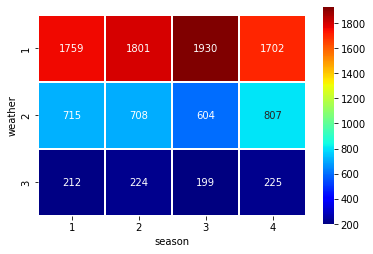

In [ ]:
sns.heatmap(pd.crosstab(df['weather'], df['season']), cmap= "jet", annot = True, fmt = 'd', square=1, linewidth=1.)
plt.show()

# Proportion of season differ across different weather. 

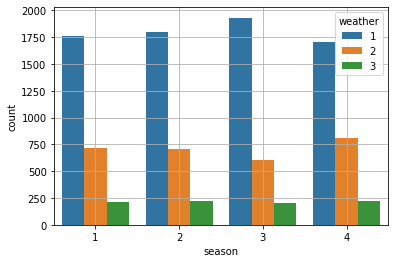

In [ ]:
sns.countplot(data=df, x='season',hue='weather')
plt.grid()
plt.show()

# In season 3 most of the days have weather 1 and less days have with weather 3, Compared to other season.
# likelihood of weather 1 is different in different seasons.

All appropriate insights are mentioned with relevent code as comments. All the results are printed for relevent test. 

Objective:

* Company want to increase their customers

* Company want to increase their revenue

Comany facing challanges about revenue and want to understand the factors on which the demand for these shared electric cycles depends.


Reasons might be:


Customer accession problem (less new customers addition) ===

* less awareness (people don't know about rent vehicals)

* less popularity (people don't know about this company)

* less demand (customers no needed for vehicals frequently)

* less attraction (people finding better options from other company)

* lack of new trends (people not finding product innovative or useful)



Customer retention problem (loosing existing customers) ===

* Low satisfaction (customer not liking product or service)

* Non availability of vehicles (customers not getting vehicals)

* Logistical issues (vehicals not available at desired place)

* Price issues (customers may find rent unreasonable)

* High competition (customers may swiching for better option)


Suggestion: 

* company should use datascince and understand factors associated with demand

* company should imporove inventory and logistics management 

* company should improve suppy demand managemement



### All in one Hypothesis testing Code

In [ ]:
Mu = 0
Sigma = 18

Sample1 = [12, 18, 12, 13, 15, 1, 7,  
                        20, 21, 25, 19, 31, 21, 17,  
                        17, 15, 19, 15, 12, 15] 
Sample2 = [23, 22, 24, 25, 21, 26, 21,  
                        21, 25, 30, 24, 21, 23, 19,  
                        14, 18, 14, 12, 19, 15] 
Sample3 = [0.0864, 0.2522, 0.0894, 0.2724, 0.0853, 0.1367, 0.853]


Samples = [Sample1, Sample2,Sample3]
alpha = 0.05 
alternative = 'two-sided'  # 'less' , 'greater'
H0 = 'means are equal'       # Sample1>=Sample2    # Sample1<=Sample2
Ha = 'means are not equal'   # Sample1<Sample2     # Sample1>Sample2
print('null hypothesis:',H0)
print(len(Samples), 'Sample')


if not all(Samples):
  print('Check Samples detail?')
  exit()

if type(Sample1[0])==list:
  print('Chi square test')
  from scipy.stats import chi2_contingency  
  test, p_val, dof, expected_val = chi2_contingency(Sample1)  
  print("p-value is: " + str(p_val)) 
  if p_val <= alpha:  
      print('We can reject the null hypothesis')  
  else:  
      print('We can accept the null hypothesis')  
  
elif len(Samples)>2:
  print('Anova f test')
  from scipy.stats import f_oneway  
  f_test, p_val = f_oneway(*Samples)  
  print("p-value is: " + str(p_val))
  if p_val < alpha:      
      print("We can reject the null hypothesis")  
  else:  
      print("We can accept the null hypothesis")  
  
elif len(Samples)>1:
  print('t-test')
  from scipy.stats import ttest_ind 
  t_test,p_val = ttest_ind(*Samples, alternative=alternative)
  print("p-value of independent t-test is: ", p_val)
  if p_val < alpha:      
      print("We can reject the null hypothesis")  
  else:  
      print("We can accept the null hypothesis") 
  from scipy.stats import ttest_rel
  t_test, p_val = ttest_rel(*Samples, alternative=alternative)  
  print("p-value of the paried t-test is: ", p_val)
  # taking the threshold value as 0.05 or 5%  
  if p_val < 0.05:  
      print("We can reject the null hypothesis")  
  else:  
      print("We can accept the null hypothesis") 
    
  
elif len(Samples)==1:
  print('t test')
  from scipy.stats import ttest_1samp			
  t_stat, p_val = ttest_1samp(Sample1, Sigma, alternative=alternative)	
  print("P-value is: ", p_val)  
  if p_val < 0.05:      
      print(" We can reject the null hypothesis")  
  else:  
      print("We can accept the null hypothesis") 


null hypothesis: means are equal
3 Sample
Anova f test
p-value is: 6.533367433350502e-11
We can reject the null hypothesis
